# Clasificador de Casas

- Este notebook estará hecho para crear un clasificador de casas basado en un dataset encontrado en Kaggle. 
- Limpiar los datos
- Entrenarlo con el modelo de clasificación más apropiado 
- Probar con supervisado y no supervisado 
- Hacer la predicción y compararlo con el dataset de test 



#### Workflow 

- Extraer los datos 
- Limpiarlos 
- Crear features para ver crear los 4 tipos de clasificación 
- Entrenar distintos modelos con los datos 
- Hacer predicciones 

#### About Dataset

Suppose there is an investment fund planning to invest in properties at hundreds of locations. 🏠 Based on the previous millions of property sales over the past few years, the fund house wants to identify the property which can result in a higher gain on investment. 💰 They can not go by analyzing all the properties one by one. 🤔 So they want the segmentation of properties so that they can look into their target segments. 🎯 So this challenge is going to help them by easily identifying their target properties using advanced AI and Analytics. 🔍

In the first week, you will receive a dataset of real estate properties with locality, estimated price, and selling price for the last 23 years. 📊 
1. The task is to identify the input features in the dataset and use them to predict the sale price of a property. 🔮 After this modelling of input and output features, predict the sale price of all the properties in the test dataset. 💵 
2. Once the sale prices for the test data are predicted, put these properties into 4 segments. 🔢 These segments can be formed according to the gain. 💹 The gain is calculated based on the estimated price and predicted sale price (Gain = (Sale price - Estimated price)/100).
3. Finally, you need to submit your results as the segment level for each of the properties given in the test data. 📝 

For reference, the properties need to be segmented into the following 4 segments according to the gain calculated based on the predicted sale:

0. Premium Properties 💰🏰
1. Valuable Properties 💎🏡
2. Standard Properties 🏘️💸
3. Budget Properties 🏠💵


In [2]:
# Para la manipulación de datos 
import pandas as pd 
import numpy as np 

# Para la visualización de los datos 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Para conexión de API 
import kaggle
import os 

# Para crear el clasificador 
## No supervisado 
from sklearn.cluster import KMeans, DBSCAN

## Supervisado 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Para procesar datos 

from sklearn.pipeline import Pipeline

# Para guardar el modelo 
import pickle




## Extracción de datos

In [3]:
# Leemos los datos 

train = pd.read_csv(r'C:\Users\Gabriel Castillo\Desktop\Cosas Gabriel\Casas Kaggle\train.csv')
test = pd.read_csv(r'C:\Users\Gabriel Castillo\Desktop\Cosas Gabriel\Casas Kaggle\test.csv')

In [4]:
# Observamos el dataset 

train.head()


,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
0,2009,2009-01-02,Greenwich,40 ETTL LN UT 24,711270.0,975000.0,Condo,Condominium,2,760,1.025953
1,2009,2009-01-02,East Hampton,18 BAUER RD,119970.0,189900.0,Single Family,Detached House,3,921,1.025953
2,2009,2009-01-02,Ridgefield,48 HIGH VALLEY RD.,494530.0,825000.0,Single Family,Detached House,3,982,1.025953
3,2009,2009-01-02,Old Lyme,56 MERIDEN RD,197600.0,450000.0,Single Family,Detached House,3,976,1.025953
4,2009,2009-01-02,Naugatuck,13 CELENTANO DR,105440.0,200000.0,Single Family,Detached House,3,947,1.025953


In [5]:
# Observamos que hay al final 

train.tail()

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
553947,2022,2022-12-31,Enfield,50 SWORD AVE,122420.0,198000.0,Residential,Detached House,3,1009,1.003979
553948,2022,2022-12-31,Naugatuck,10 ROLLINGWOOD DR,139180.0,319900.0,Residential,Detached House,3,999,1.003979
553949,2022,2022-12-31,South Windsor,189 PALMER DR,200000.0,305000.0,Residential,Detached House,3,1017,1.003979
553950,2022,2022-12-31,Bloomfield,33 BURNWOOD DRIVE,195440.0,271000.0,Residential,Detached House,3,1061,1.003979
553951,2022,2022-12-31,Stamford,154 GAYMOOR DRIVE,346600.0,500000.0,Residential,Detached House,3,1003,1.003979


## Limpieza de datos

In [6]:
# Obtenemos información del dataset 

print('El dataset tiene', train.shape, 'de dimensiones')

El dataset tiene (553952, 11) de dimensiones


In [7]:
# Vemos los tipos de datos que tiene 

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553952 entries, 0 to 553951
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               553952 non-null  int64  
 1   Date               553952 non-null  object 
 2   Locality           553952 non-null  object 
 3   Address            553952 non-null  object 
 4   Estimated Value    553952 non-null  float64
 5   Sale Price         553952 non-null  float64
 6   Property           553952 non-null  object 
 7   Residential        553952 non-null  object 
 8   num_rooms          553952 non-null  int64  
 9   carpet_area        553952 non-null  int64  
 10  property_tax_rate  553952 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 46.5+ MB


In [8]:
# Nos deshacemos de los que no necesitamos 

train = train.drop(columns=['property_tax_rate','Address', 'Year'], axis=1)
train

,Date,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area
0,2009-01-02,Greenwich,711270.0,975000.0,Condo,Condominium,2,760
1,2009-01-02,East Hampton,119970.0,189900.0,Single Family,Detached House,3,921
2,2009-01-02,Ridgefield,494530.0,825000.0,Single Family,Detached House,3,982
3,2009-01-02,Old Lyme,197600.0,450000.0,Single Family,Detached House,3,976
4,2009-01-02,Naugatuck,105440.0,200000.0,Single Family,Detached House,3,947
...,...,...,...,...,...,...,...,...
553947,2022-12-31,Enfield,122420.0,198000.0,Residential,Detached House,3,1009
553948,2022-12-31,Naugatuck,139180.0,319900.0,Residential,Detached House,3,999
553949,2022-12-31,South Windsor,200000.0,305000.0,Residential,Detached House,3,1017
553950,2022-12-31,Bloomfield,195440.0,271000.0,Residential,Detached House,3,1061


In [14]:
# Cambiamos el tipo de Date (de object a datetime)

train.Date = pd.to_datetime(train.Date, infer_datetime_format=True)

c:\Users\Gabriel Castillo\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
# Vemos como se queda el dataframe después de algunas modificaciones 

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553951 entries, 0 to 553951
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             553951 non-null  datetime64[ns]
 1   Locality         553951 non-null  object        
 2   Estimated Value  553951 non-null  float64       
 3   Sale Price       553951 non-null  float64       
 4   Property         553951 non-null  object        
 5   Residential      553951 non-null  object        
 6   num_rooms        553951 non-null  int64         
 7   carpet_area      553951 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 38.0+ MB


In [16]:
# Vemos cuantas propiedades hay en cada localidad 

train['Locality'].value_counts()

Bridgeport    17672
Waterbury     15537
Stamford      15341
Norwalk       12800
Fairfield     11118
              ...  
Franklin        224
Scotland        223
Eastford        222
Canaan          220
Union            99
Name: Locality, Length: 169, dtype: int64

In [17]:
# Quitamos el ***Unknown***

train = train[train['Locality'] != '***Unknown***']
train

,Date,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area
0,2009-01-02,Greenwich,711270.0,975000.0,Condo,Condominium,2,760
1,2009-01-02,East Hampton,119970.0,189900.0,Single Family,Detached House,3,921
2,2009-01-02,Ridgefield,494530.0,825000.0,Single Family,Detached House,3,982
3,2009-01-02,Old Lyme,197600.0,450000.0,Single Family,Detached House,3,976
4,2009-01-02,Naugatuck,105440.0,200000.0,Single Family,Detached House,3,947
...,...,...,...,...,...,...,...,...
553947,2022-12-31,Enfield,122420.0,198000.0,Residential,Detached House,3,1009
553948,2022-12-31,Naugatuck,139180.0,319900.0,Residential,Detached House,3,999
553949,2022-12-31,South Windsor,200000.0,305000.0,Residential,Detached House,3,1017
553950,2022-12-31,Bloomfield,195440.0,271000.0,Residential,Detached House,3,1061


In [18]:
# Vemos cuantos tipos de properties y de residentials hay 

print(train['Property'].value_counts())

print('\n')

print(train['Residential'].value_counts())

Single Family    394027
Condo            102981
Two Family        25800
Residential       16774
Three Family      12255
Four Family        2114
Name: Property, dtype: int64


Detached House    406462
Condominium       106103
Duplex             26587
Triplex            12625
Fourplex            2174
Name: Residential, dtype: int64


## Visualización de información estadística

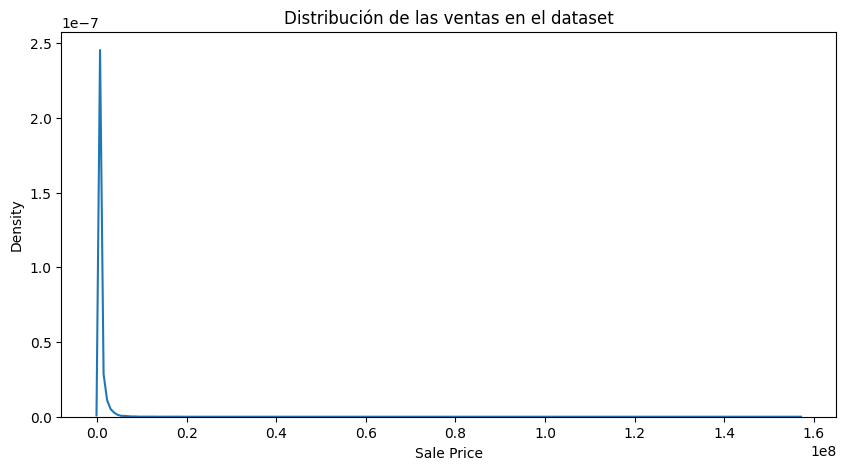

In [9]:
# Vemos la distriubción de los precios 

plt.figure(figsize=(10,5))
sns.kdeplot(data= train['Sale Price'])
plt.title('Distribución de las ventas en el dataset');

<AxesSubplot:xlabel='Year', ylabel='Sale Price'>

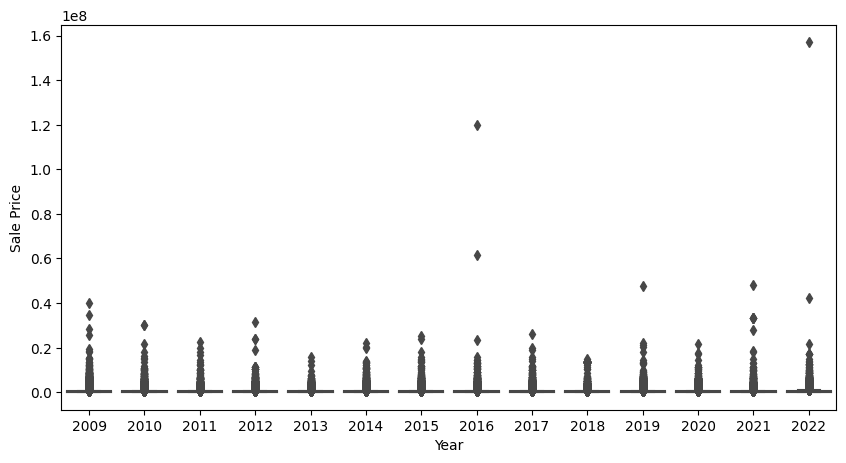

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Year, y=train['Sale Price'])

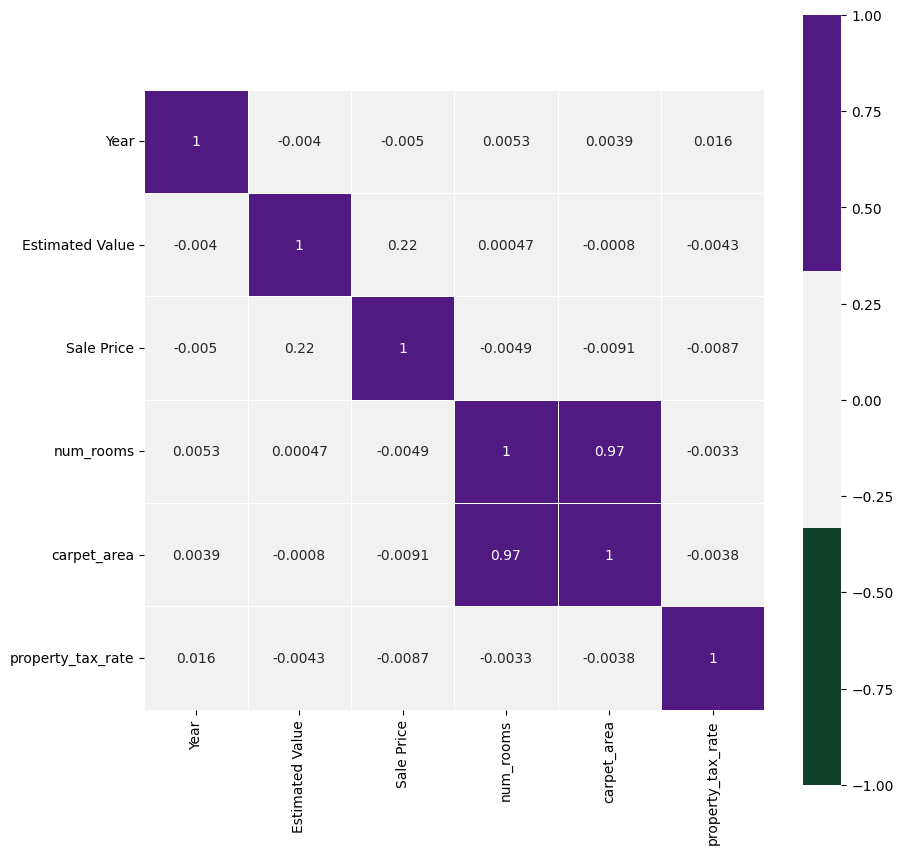

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), 
            vmin = -1, 
            vmax=1, 
            cmap= sns.diverging_palette(145, 280, s=85, l=24, n=3),
            annot= True, 
            square= True,
            linewidth = .5);

In [37]:
train.Residential.unique()

array(['Condominium', 'Detached House', 'Triplex', 'Duplex', 'Fourplex'],
      dtype=object)

In [46]:
# Buscamos que crear una linea de tiempo para los tiempos 

train = train.loc[train.Residential.isin(['Condominium', 'Detached House', 'Triplex', 'Duplex', 'Fourplex']),:]
train1 = train.groupby(['Date', 'Residential'])['Sale Price'].sum().reset_index()
train1['Year'] = train1.loc[:, 'Date']
train1.reset_index()
train1.head()

,Date,Residential,Sale Price,Year
0,2009-01-02,Condominium,9346067.0,2009-01-02
1,2009-01-02,Detached House,65859266.0,2009-01-02
2,2009-01-02,Duplex,1164999.0,2009-01-02
3,2009-01-02,Triplex,1896100.0,2009-01-02
4,2009-01-03,Condominium,7737522.0,2009-01-03


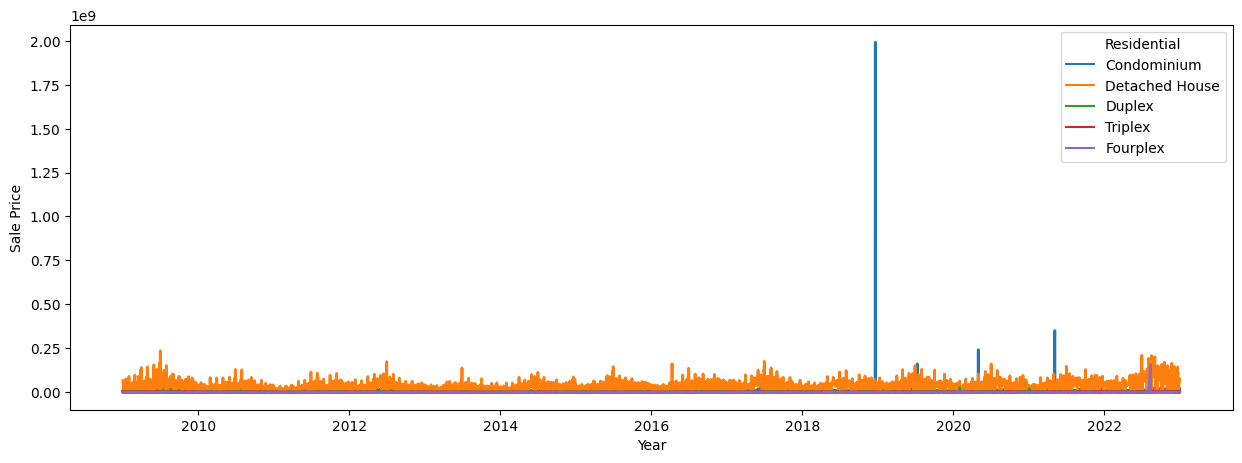

In [48]:
#  Hacemos el plot para ver como van cambiando los precios de los tipos de propiedades a lo largo de los años 

plt.figure(figsize=(15,5))
sns.lineplot(data= train1,
             x= 'Year',
             y= 'Sale Price',
             hue= 'Residential',
             linewidth= 2);


## Modelos

### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

